In [1]:
#Importing the libraries

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from textblob import TextBlob #used for sentiment analysis
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder

In [2]:
import pandas as pd
df = pd.read_csv('C:/Users/E7440/Projects_22/PyProject workspace/Python-Projects/Netflix-titles-Analysis/Netflix_data.csv')
df


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [3]:
# cheak the shape of the dataset
print(f'This dataset contains: \n {df.shape[0]} rows and \n {df.shape[1]} columns')


This dataset contains: 
 8807 rows and 
 12 columns


In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
df = df.drop(['date_added', 'description'], axis=1)
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [6]:
# now cheak the updated data's rows and columns
print(f'This dataset contains {df.shape[0]} rows and {df.shape[1]} columns now')

This dataset contains 8807 rows and 10 columns now


In [7]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

In [8]:
#cheak the missing value
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
release_year       0
rating             4
duration           3
listed_in          0
dtype: int64

In [9]:
#percentage of the missing value
df.isnull().sum() * 100 / len(df)

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
dtype: float64

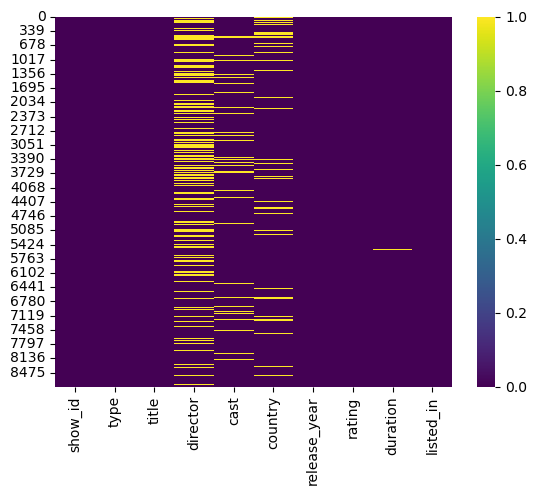

In [10]:
# visulaize the missing value
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(),cmap='viridis')
plt.show()

In [11]:
df.dropna(subset= ['duration'], inplace=True)

In [12]:
df.shape

(8804, 10)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8804 entries, 0 to 8806
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8804 non-null   object
 1   type          8804 non-null   object
 2   title         8804 non-null   object
 3   director      6170 non-null   object
 4   cast          7979 non-null   object
 5   country       7973 non-null   object
 6   release_year  8804 non-null   int64 
 7   rating        8800 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8804 non-null   object
dtypes: int64(1), object(9)
memory usage: 756.6+ KB


In [14]:
df.dropna(subset= ["director", 'cast'], inplace=True)
df.shape

(5697, 10)

In [15]:
df["country"].fillna(df["country"].mode()[0], inplace=True)
df["rating"].fillna(df["rating"].mode()[0], inplace=True)
df.shape

(5697, 10)

In [16]:
#Checking the porcentage of null values at hits point
df.isnull().sum()/len(df)*100

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
dtype: float64

In [17]:
df['type'].value_counts()

type
Movie      5519
TV Show     178
Name: count, dtype: int64

In [18]:
# Distribution of content ratings on Netflix
content_type = df.groupby(['type']).size().reset_index(name='counts')
content_type
# Ploting Distribution of content ratings on Netflix
fig = px.pie(content_type, names = 'type',values = 'counts',color_discrete_sequence =  px.colors.sequential.Agsunset,
             title = 'Content type distribution on Netflix',height =  500 , width = 700)
fig.show()

In [19]:
df['country'].value_counts()

country
United States                                   2210
India                                            875
United Kingdom                                   183
Canada                                           107
Spain                                             91
                                                ... 
Uruguay, Guatemala                                 1
Romania, Bulgaria, Hungary                         1
Philippines, United States                         1
India, United Kingdom, Canada, United States       1
United Arab Emirates, Jordan                       1
Name: count, Length: 604, dtype: int64

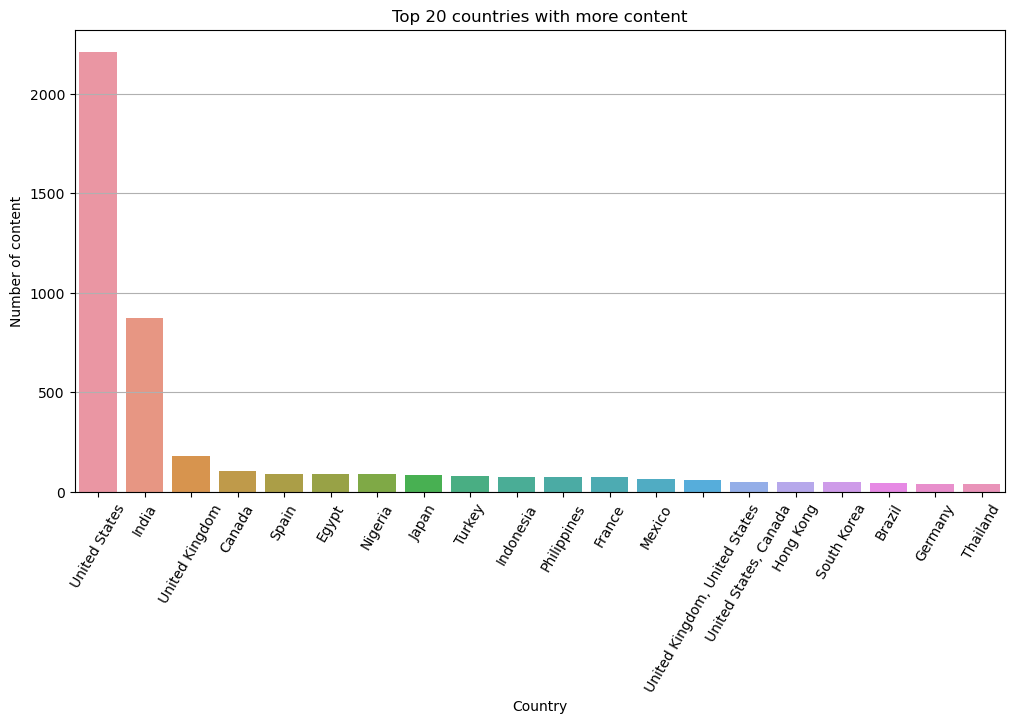

country
United States                    2210
India                             875
United Kingdom                    183
Canada                            107
Spain                              91
Egypt                              90
Nigeria                            88
Japan                              83
Turkey                             79
Indonesia                          76
Philippines                        74
France                             73
Mexico                             64
United Kingdom, United States      59
United States, Canada              52
Hong Kong                          49
South Korea                        48
Brazil                             46
Germany                            41
Thailand                           41
Name: count, dtype: int64

In [20]:
top_countries = df['country'].value_counts().head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 20 countries with more content')
plt.xlabel('Country')
plt.ylabel('Number of content')
plt.grid(True, axis='y')
plt.xticks(rotation=60)
plt.show()

top_countries

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'Canada'),
  Text(4, 0, 'Spain'),
  Text(5, 0, 'Egypt'),
  Text(6, 0, 'Nigeria'),
  Text(7, 0, 'Japan'),
  Text(8, 0, 'Turkey'),
  Text(9, 0, 'Indonesia'),
  Text(10, 0, 'Philippines'),
  Text(11, 0, 'France'),
  Text(12, 0, 'Mexico'),
  Text(13, 0, 'United Kingdom, United States'),
  Text(14, 0, 'United States, Canada'),
  Text(15, 0, 'Hong Kong'),
  Text(16, 0, 'South Korea'),
  Text(17, 0, 'Brazil'),
  Text(18, 0, 'Germany'),
  Text(19, 0, 'Thailand')])

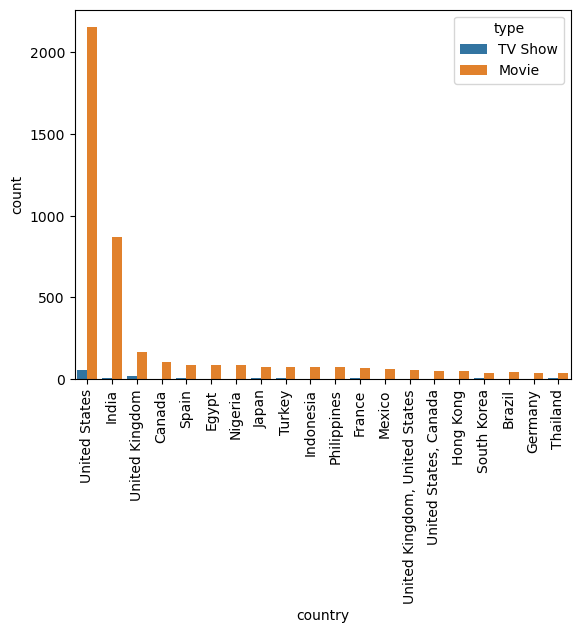

In [21]:
sns.countplot(x = df['country'], order = top_countries.index, hue = df['type'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'Canada'),
  Text(4, 0, 'Spain'),
  Text(5, 0, 'Egypt'),
  Text(6, 0, 'Nigeria'),
  Text(7, 0, 'Japan'),
  Text(8, 0, 'Turkey'),
  Text(9, 0, 'Indonesia'),
  Text(10, 0, 'Philippines'),
  Text(11, 0, 'France'),
  Text(12, 0, 'Mexico'),
  Text(13, 0, 'United Kingdom, United States'),
  Text(14, 0, 'United States, Canada'),
  Text(15, 0, 'Hong Kong'),
  Text(16, 0, 'South Korea'),
  Text(17, 0, 'Brazil'),
  Text(18, 0, 'Germany'),
  Text(19, 0, 'Thailand')])

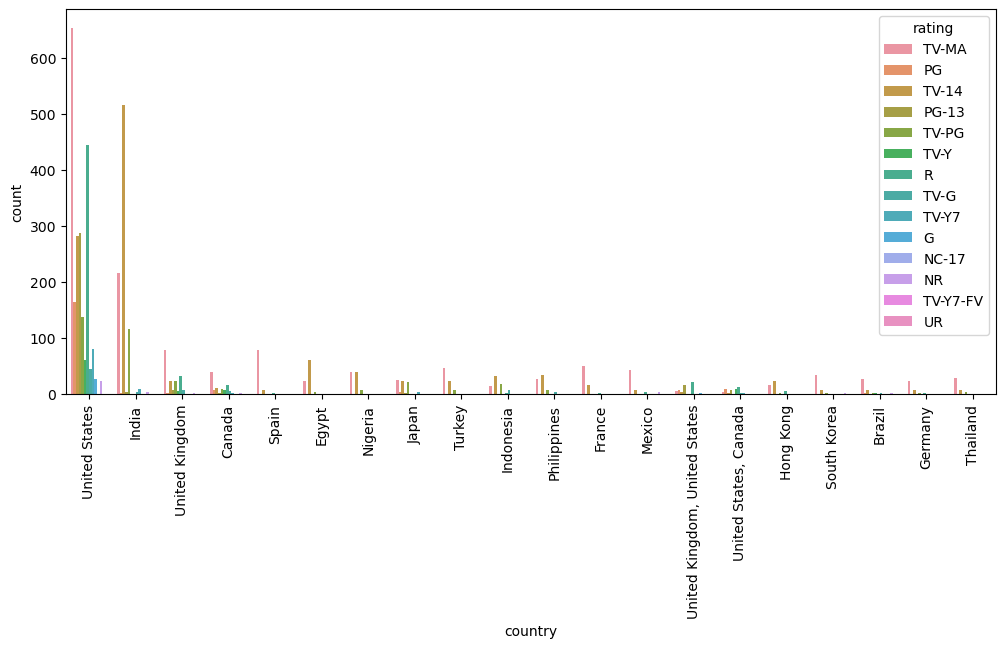

In [22]:
plt.figure(figsize=(12,5))
sns.countplot(x = df['country'], order = top_countries.index, hue =df['rating'] )
plt.xticks(rotation=90)

In [25]:
fig = px.histogram(df, x="rating", color="rating")
fig.update_layout(
    bargap=0.2
)
fig.show()

In [26]:
#Ratings
ratings = df.groupby(['rating']).size().reset_index(name='counts')
ratings
# Ploting Distribution of content ratings on Netflix
fig = px.pie(ratings, names = 'rating',values = 'counts',
             title = 'Distribution of ratings on Netflix',height =  600 , width = 600)
fig.show()

In [28]:
fig = px.bar(x=df["release_year"].value_counts().index, 
             y=df["release_year"].value_counts().values, 
             color=df["release_year"].value_counts().index)

# Update layout with customized title, axis labels, and background colors

fig.update_layout(
    title={
        'text': "Release Years",
        'font': {'color': 'black'}
    },
    xaxis_title={
        'text': "Release Year",
        'font': {'color': 'black'}
    },
    yaxis_title={
        'text': "Count",
        'font': {'color': 'black'}
    },
)

          




          



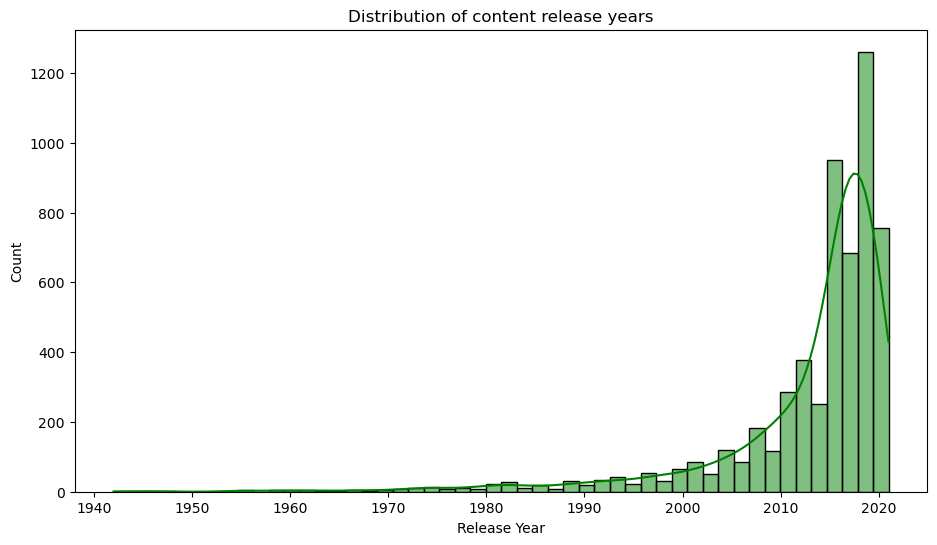

In [29]:
#Distribution of content release years
plt.figure(figsize=(11, 6))
sns.histplot(df['release_year'], bins=50, kde=True, color='green')
plt.title('Distribution of content release years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

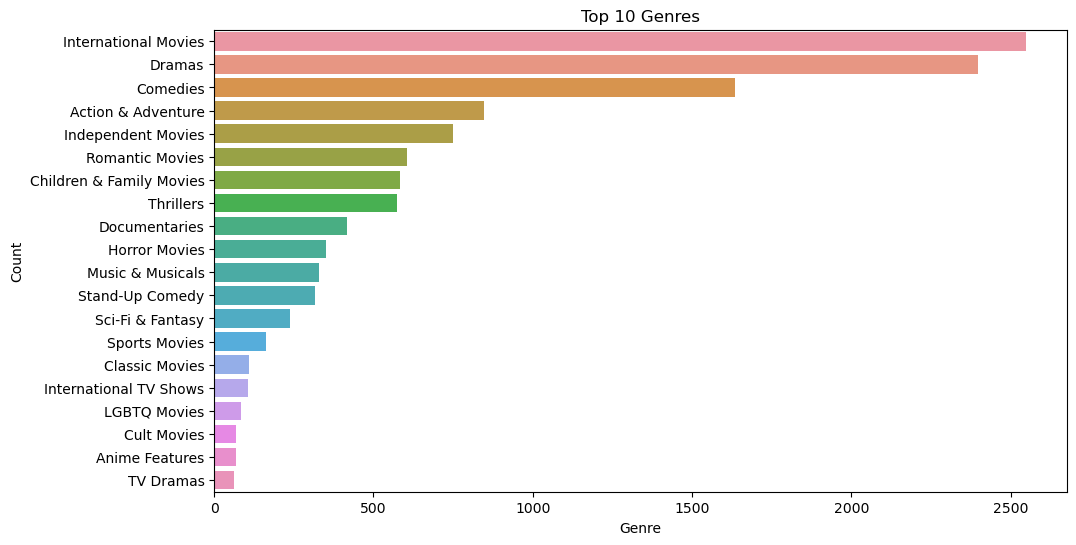

In [30]:
#let's listed in conlumns
plt.figure(figsize=(11, 6))
df['listed_in'] = df['listed_in'].str.split(', ')
genres = df['listed_in'].explode().value_counts().head(20)
sns.barplot(x=genres.values, y=genres.index)
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show